In [1]:
from aspy.analytic_server import *
from aspy.aslgen import *

In [2]:
ass = analytic_server("ga1.fyre.ibm.com",9080,False,"admin","test")

In [3]:
rs = ass.create_pipeline().read_datasource("DRUG1N").select("lambda x: x.Age>30").derive("ratio","lambda x:x.Na/x.K").aggregate(["BP"],["count","mean_ratio"]).run()

In [4]:
for row in rs:
    print(row)

[u'BP', u'Record_Count', u'mean_ratio']
[u'LOW', 56, 16.989521616806176]
[u'HIGH', 55, 15.68008381792773]
[u'NORMAL', 41, 14.137524664093023]


In [5]:
df = rs.toPandas()
df

,BP,Record_Count,mean_ratio
0,LOW,56,16.989522
1,HIGH,55,15.680084
2,NORMAL,41,14.137525


/opt/conda/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


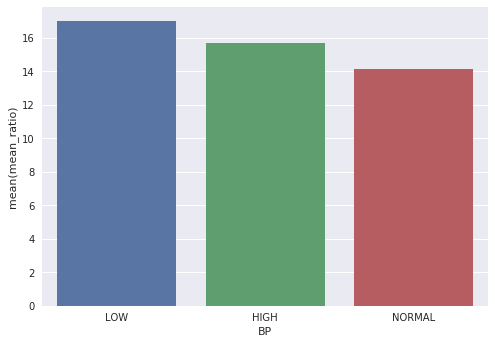

In [6]:
%matplotlib inline
import seaborn as sns
sns.barplot(x="BP",y="mean_ratio",hue=None,data=df)